# Exercise set 7


>The goal of this exercise is to learn how to perform a
>**principal component analysis (PCA)**. We will here focus
>on how we can plot and inspect the scores and loadings,
>and the variance explained by different principal components (PCs).

## Exercise 7.1

In the exercise, we will investigate if we can
"discover" the periodic table from a data set that
contains information on the first 86 elements (period 1&ndash;6).
The variables present in this data set are described
in Table 1.

|**Column**        | **Description**                                         | **Unit** |
|------------------|---------------------------------------------------------|----------|
|element           | The symbol for the element (e.g. H, He, etc.)           | —        |
|metal             | Classification of the element as a metal (1) or not (0) | —        |
|density           | Density of the element                                  | g/cm$^3$ |
|atomic_radius     | Radius of the element                                   | Å        |
|electronegativity | The electronegativity of the element                    | —        |
|first_ionization  | The first ionization energy of the element              |          |
|neutrons          | The number of neutrons in the element                   | —        |
|protons           | The number of protons in the element                    | —        |
|electrons         | The number of electrons in the element                  | —        |
|1s, 2s, 2p, etc.  | The number of electrons in different orbitals           | —        |
|**Table 1:** *Data columns present in the file [Data/periodic_table.csv](./Data/periodic_table.csv)*        |          |

We will use principal component analysis to investigate the data set,
and in this exercise, we will focus on creating plots for
the scores, loadings, and explained variance.

**(a)**  Begin by loading the data, this can be done with:

In [1]:
from itertools import cycle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
%matplotlib notebook
plt.style.use(['seaborn-notebook', './tkj4175.mplstyle'])

data = pd.read_csv('Data/periodic_table.csv')
data

,element,metal,mass,density,atomic_radius,electronegativity,first_ionization,neutrons,protons,electrons,...,4s,3d,4p,5s,4d,5p,6s,4f,5d,6p
0,H,0,1.007,0.000090,0.79,2.20,13.5984,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,He,0,4.002,0.000179,0.49,4.16,24.5874,2,2,2,...,0,0,0,0,0,0,0,0,0,0
2,Li,1,6.941,0.534000,2.10,0.98,5.3917,4,3,3,...,0,0,0,0,0,0,0,0,0,0
3,Be,1,9.012,1.850000,1.40,1.57,9.3227,5,4,4,...,0,0,0,0,0,0,0,0,0,0
4,B,0,10.811,2.340000,1.20,2.04,8.2980,6,5,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Pb,1,207.200,11.300000,1.80,2.33,7.4167,125,82,82,...,2,10,6,2,10,6,2,14,10,2
82,Bi,1,208.980,9.810000,1.60,2.02,7.2856,126,83,83,...,2,10,6,2,10,6,2,14,10,3
83,Po,0,210.000,9.320000,1.50,2.00,8.4170,126,84,84,...,2,10,6,2,10,6,2,14,10,4
84,At,0,210.000,7.000000,1.40,2.20,9.3000,125,85,85,...,2,10,6,2,10,6,2,14,10,5


After having a quick look at the data (and the description in Table 1) &ndash;
do you think it is a good idea to scale the data in this case? Why/why not?

**Your answer to question 7.1(a):**

The variables have different units, so here it is a good idea to scale the data. They measure different things, and we don't want something to be more important, just because of the units.

**(b)**  Next, run a principal component analysis on the data you just
loaded. This can be done with:

In [2]:
variables = [i for i in data.columns if i not in ('element', 'metal')] 
elements = data['element'].values
X = data[variables]

# To not scale the data, comment this:
X = scale(X)

# Run PCA and obtain the scores:
pca = PCA()
scores = pca.fit_transform(X)

Notice here that we do not include the metal classification in the
data set we analyze. This is
because we are going to use it for "coloring" the data at a later
point, without using it to create the PCA model. (That is, since we
do not use it when running the PCA, we can later check if the PCA
groups metals in a particular way.)

The last line in the code above
performs the principal component analysis and returns the scores.
In your own words, how would you describe scores? Check the
dimensionality of the scores matrix &ndash; is this as expected?

In [3]:
print('Dimensions for scores:', scores.shape)
print('Dimensions for original data', X.shape)

Dimensions for scores: (86, 23)
Dimensions for original data (86, 23)


**Your answer to question 7.1(b):**

The scores are the coordinates in the new coordinate system found by the PCA. The directions in the new coordinate system point toward the directions of the largest variance in the original data.

There are 86 rows and 23 columns in the scores matrix. 86 is the number of observations we have (number of elements), and 23 is the number of principal components found in the PCA.
The maximum number of principal components we can find is
equal to the original number of variables (23), and we see here that the PCA we just did defaults to finding
the maximum number of principal components.

**(c)**  Plot the scores for principal component number 1 agains the scores
of principal component number 2. This can be done with:

<IPython.core.display.Javascript object>


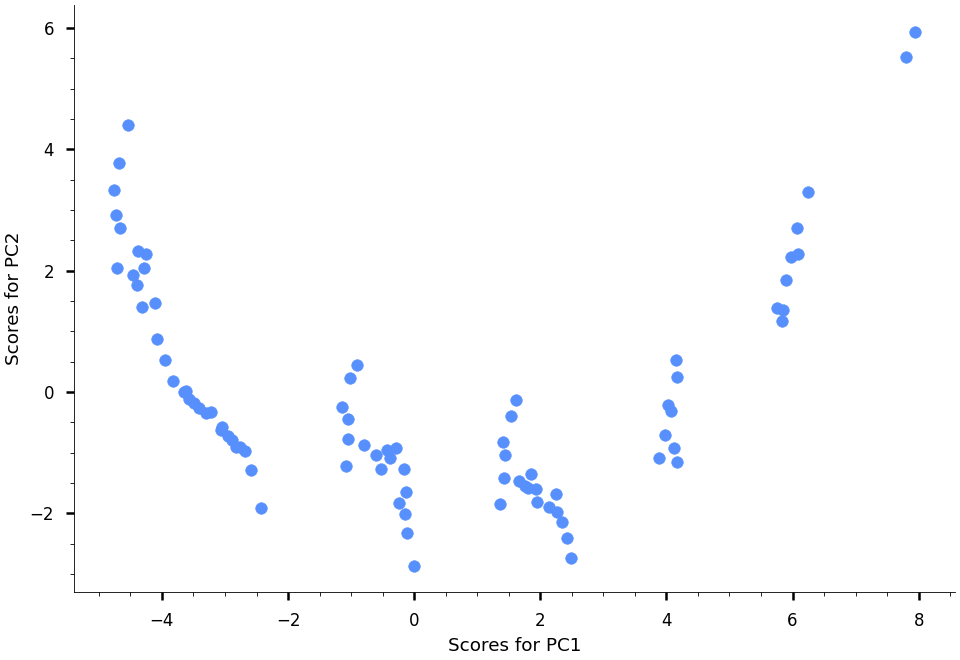

In [4]:
# Plot scores for the two first principal components:
fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(scores[:, 0], scores[:, 1])
ax.set(xlabel='Scores for PC1', ylabel='Scores for PC2');

Here, you can also
show labels for the elements with the following modification to the code above:

<IPython.core.display.Javascript object>


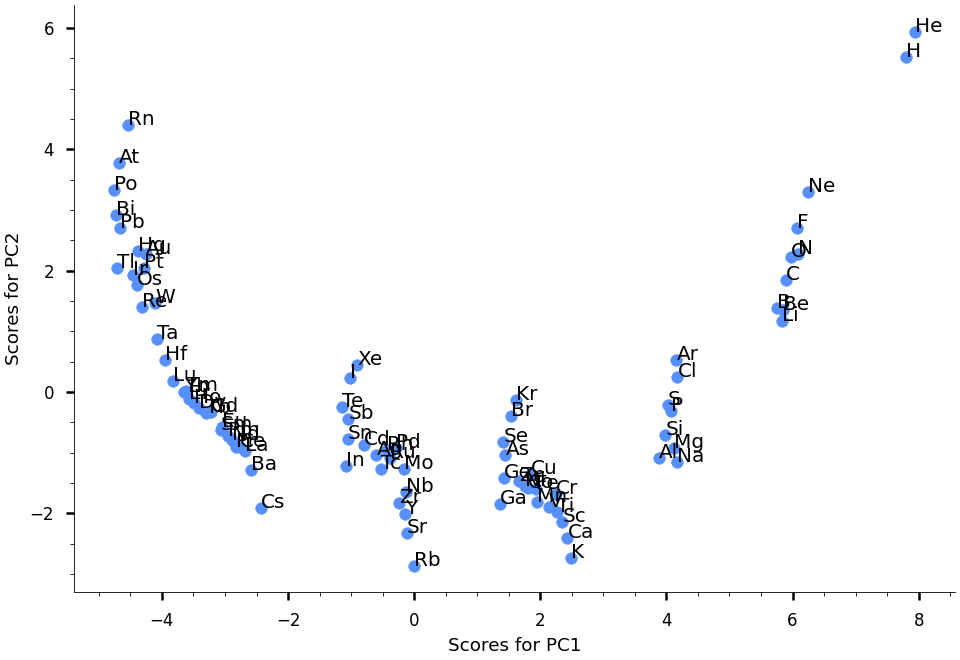

In [5]:
# Plot scores for the two first principal components
# + add element symbols
fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(scores[:, 0], scores[:, 1])
ax.set(xlabel='Scores for PC1', ylabel='Scores for PC2')
# Add labels for the elements:
for i, symbol in enumerate(elements):
    ax.text(scores[i, 0], scores[i, 1], symbol, fontsize='large')

Do you observe any groupings or trends in the data? How does this compare with the periodic system?

**Your answer to question 7.1(c):**

Along PC1, it certainly looks like we have 6 groups in our data. By closer inspection, we see that each group contains the elements from one row in the periodic table. So the PCA analysis has found the rows in the periodic table. Further, the elements in one such group are largely sorted so that the element with the most electrons is highest up (along PC2).

**(d)**  Add some color to your scores plot by coloring the elements according to their
classification as metals or not. This can be done by using the `c` argument
of the `ax.scatter` method:

<IPython.core.display.Javascript object>


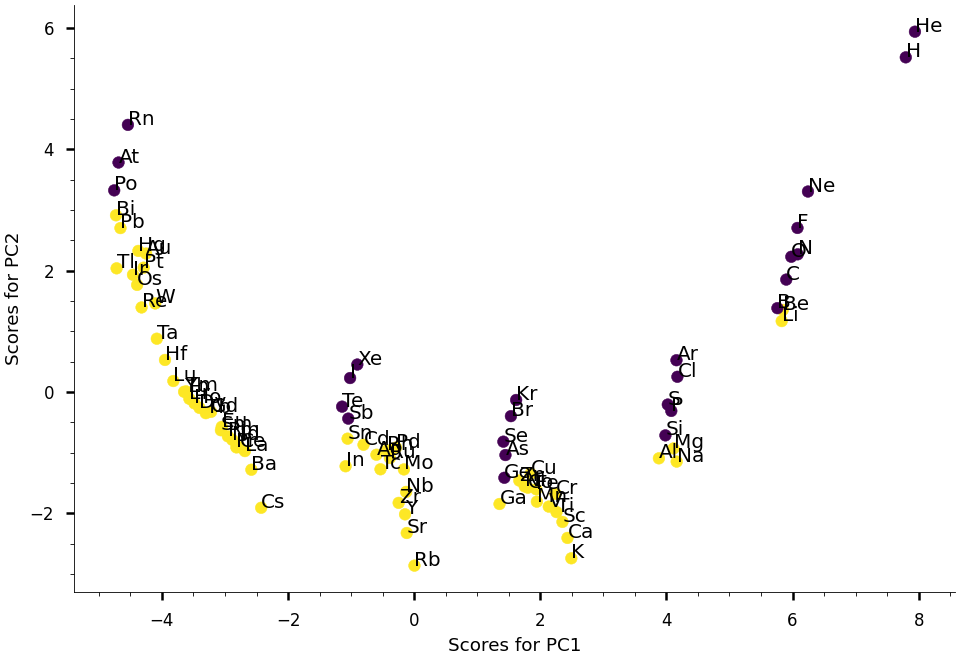

In [6]:
# Plot scores for the two first principal components + add element symbols
fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(scores[:, 0], scores[:, 1], c=data['metal'].values)
ax.set(xlabel='Scores for PC1', ylabel='Scores for PC2')
# Add labels for the elements:
for i, symbol in enumerate(elements):
    ax.text(scores[i, 0], scores[i, 1], symbol, fontsize='large')

Do you observe any new groupings/trends in the data after
adding this extra color? Here, you can also experiment with using different
columns for coloring the data, for instance, the number of electrons.

<IPython.core.display.Javascript object>


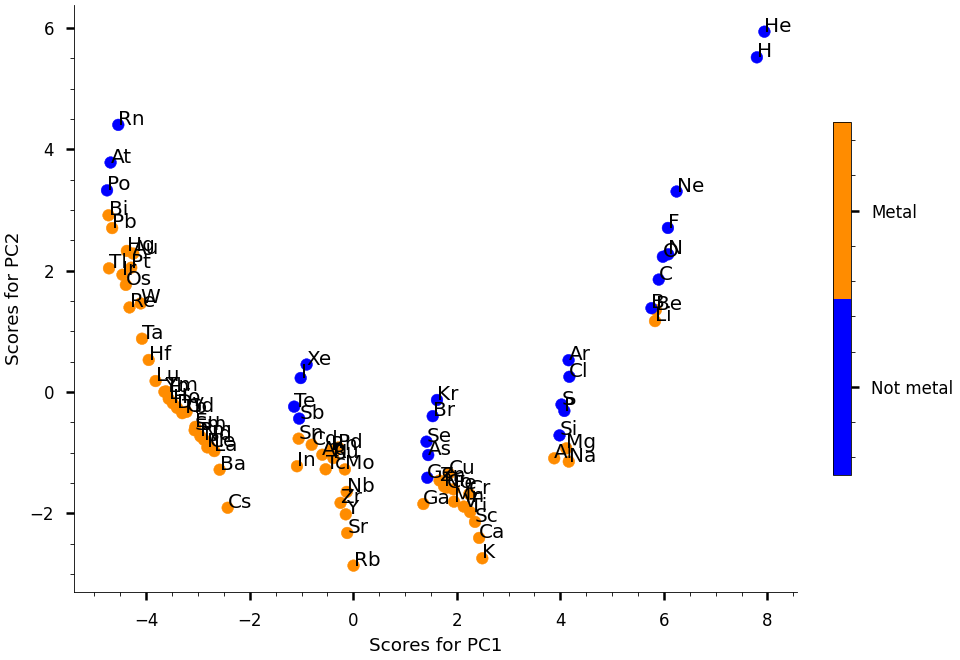

In [7]:
import matplotlib as mpl
# Plot scores for the two first principal components + add element symbols
fig, ax = plt.subplots(constrained_layout=True)
# Add colorbar!
cmap = mpl.colors.ListedColormap(['blue', 'darkorange'])
scat = ax.scatter(scores[:, 0], scores[:, 1], c=data['metal'].values, cmap=cmap)
cbar = fig.colorbar(scat, ax=ax, ticks=[0.25, 0.75], shrink=0.6)
cbar.ax.set_yticklabels(['Not metal', 'Metal'])
ax.set(xlabel='Scores for PC1', ylabel='Scores for PC2')
# Add labels for the elements:
for i, symbol in enumerate(elements):
    ax.text(scores[i, 0], scores[i, 1], symbol, fontsize='large')

**Your answer to question 7.1(d):**

The metallic elements seem to be positioned in the lower part of the figure, and the lower part of each group.
We note that there is not a very clear separation between the elements labeled as metals and non-metals. This
is maybe as expected, many elements have the characteristics of both metals and non-metals!

**(e)**  Next, we will investigate how much of the variance we explain
with the different principal components.
The variance explained by a particular
component can be accessed by using `pca.explained_variance_ratio_`.
Below, you can find some code that will plot
the explained variance per component in a bar plot:

<IPython.core.display.Javascript object>


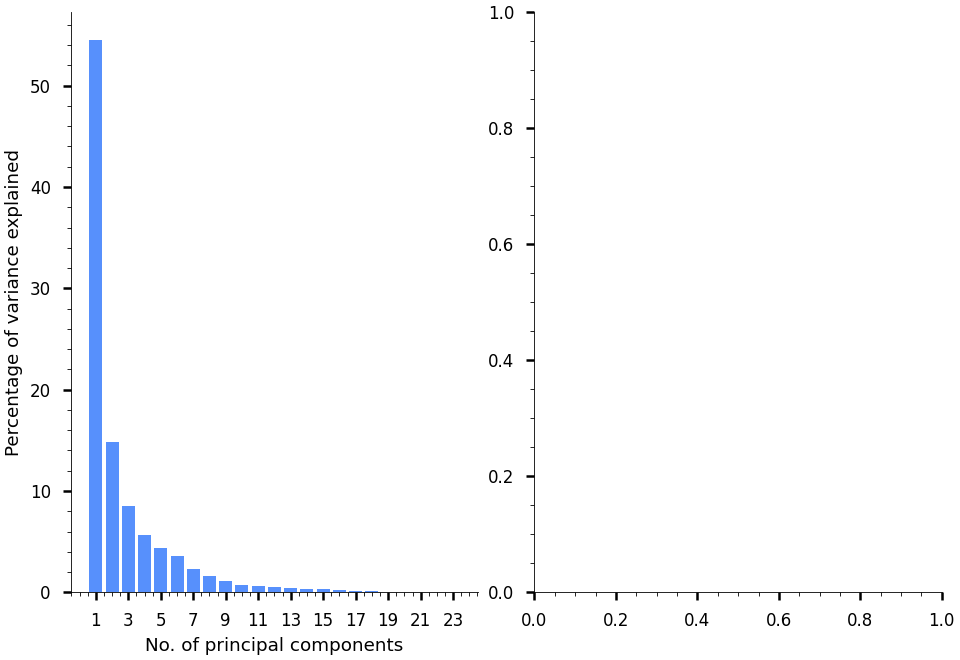

In [8]:
# Plot the explained variance:
fig, (ax1, ax2) = plt.subplots(constrained_layout=True, ncols=2)
variance = pca.explained_variance_ratio_ * 100
components = 1 + np.arange(len(variance))
ax1.bar(components, variance)
ax1.set_xticks(components[::2])
ax1.set(xlabel='No. of principal components', ylabel='Percentage of variance explained');

Add a line plot to the second axis, `ax2`, in the plot above that
shows the total variance explained by $x$ components. That is, the $x$-axis should
show the number of components used, and the $y$-axis should show the summed explained variance
when using $x$ components. For calculating the summed explained variance, you can
use the cumulative sum which can be obtained by `np.cumsum(pca.explained_variance_ratio_)`.

<IPython.core.display.Javascript object>


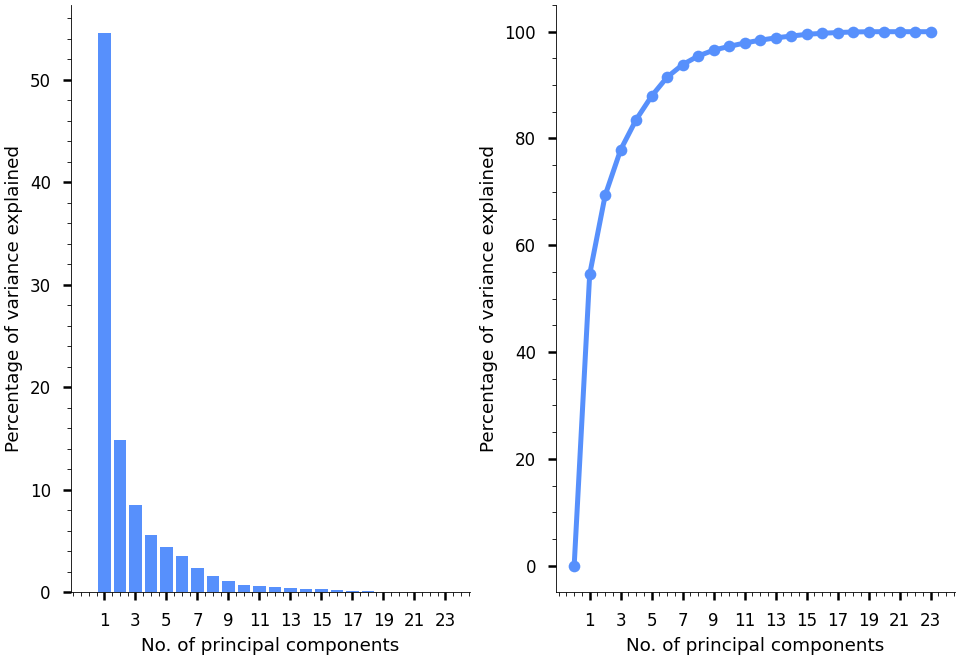

In [9]:
# Plot the explained variance:
fig, (ax1, ax2) = plt.subplots(constrained_layout=True, ncols=2, sharex=True)
variance = pca.explained_variance_ratio_ * 100
components = 1 + np.arange(len(variance))
ax1.bar(components, variance)
ax1.set_xticks(components[::2])
ax1.set(xlabel='No. of principal components', ylabel='Percentage of variance explained');
ax2.plot([0] + list(components), [0] + list(np.cumsum(variance)), marker='o')
ax2.set(xlabel='No. of principal components', ylabel='Percentage of variance explained');
ax2.set_ylim(-5, 105);

**Your answer to question 7.1(e):** (See the plot above.)

**(f)**  Based on the plot you just created for the explained variance,
how many principal components are needed
to explain at least 90\% of the variance (in the next lecture,
we will discuss why/how we use this plot to determine the "best" number of
principal components to use) in the data set?

<IPython.core.display.Javascript object>


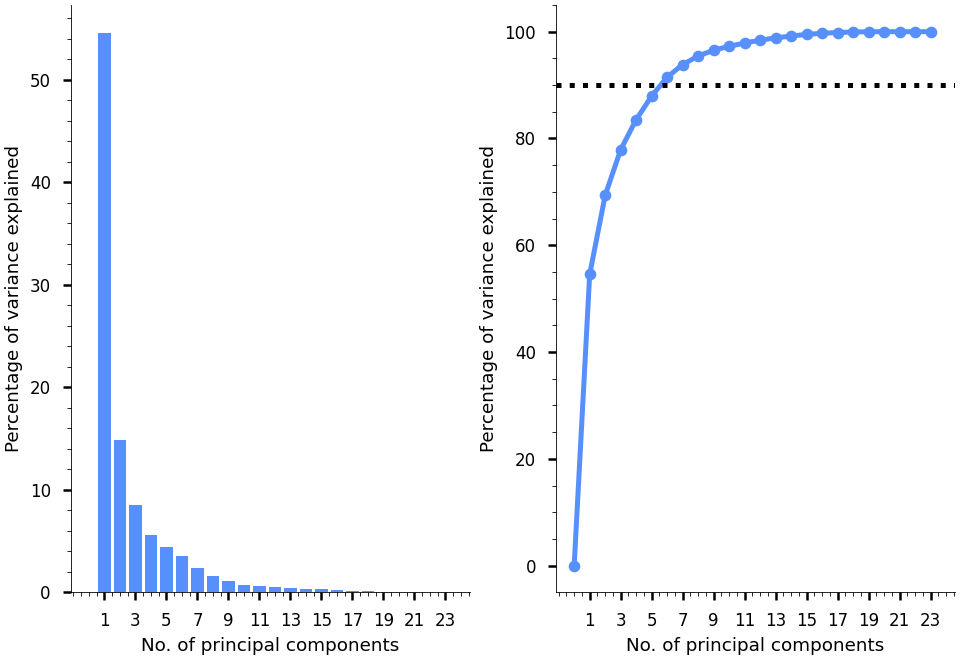

Number of components: 6


In [10]:
# Plot the explained variance:
fig, (ax1, ax2) = plt.subplots(constrained_layout=True, ncols=2, sharex=True)
variance = pca.explained_variance_ratio_ * 100
components = 1 + np.arange(len(variance))
ax1.bar(components, variance)
ax1.set_xticks(components[::2])
ax1.set(xlabel='No. of principal components', ylabel='Percentage of variance explained');
ax2.plot([0] + list(components), [0] + list(np.cumsum(variance)), marker='o')
ax2.set(xlabel='No. of principal components', ylabel='Percentage of variance explained');
ax2.set_ylim(-5, 105);
ax2.axhline(y=90, ls=':', color='k')


variance_sum = np.cumsum(variance)
idx = np.where(variance_sum > 90)[0]
print('Number of components:', components[idx[0]])

**Your answer to question 7.1(f):**

With 5 components, we describe just below 90% of the variance. With 6 components we describe at least 90% of the
variance. Thus we need at least 6 principal components in this case.

**(g)**  Next, we will investigate the loadings. In your own words, how would you
describe the term loadings?




**Your answer to question 7.1(g):**

The loadings describe how we transform the original variables to the new coordinate system (to the principal
components). Specifically, the principal components are found as linear combinations of the original variables, and
the loadings contain the coefficients for this linear combination.

**(h)**  The loadings can be accessed with:

In [11]:
# Get the loadings for PC1 and PC2:
loadings = pca.components_.T
pc1 = loadings[:, 0]
pc2 = loadings[:, 1]

Verify that `pc1` and `pc2` are normalized and that they are orthogonal to
each other (Hint: The dot product can be taken with `np.dot`).

In [12]:
print(np.dot(pc1, pc1))
print(np.dot(pc2, pc2))
print(np.dot(pc1, pc2))

0.9999999999999987
0.9999999999999984
-9.020562075079397e-17


**Your answer to question 7.1(h):**

From the dot product, we find that the vectors are normalized (dot product equal to one) and that pc1 and pc2
are orthogonal to each other (dot product equal to zero).

**(i)**  For a particular loadings vector, the $i$'th component contains the
contribution from the original variable $i$ to the principal
component described by this loadings vector. This contribution
is a number between $-1$ and $1$.

We can get an overview of the contributions to
principal component number 1 and 2 by plotting the loadings in a bar plot as follows:

<IPython.core.display.Javascript object>


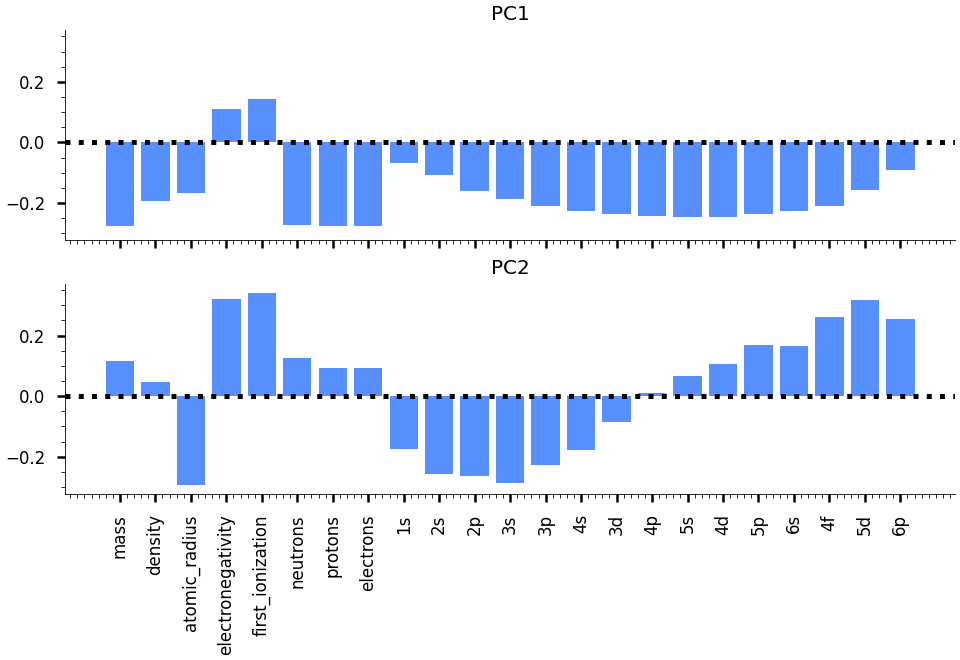

In [13]:
fig, (ax1, ax2) = plt.subplots(constrained_layout=True, nrows=2, sharex=True, sharey=True)
position = np.arange(len(pc1))
ax1.bar(position, pc1)
ax1.set_xticks(position)
ax1.set_xticklabels(variables, rotation=90)
ax1.axhline(y=0, ls=':', color='k')  # Horizontal line to show 0
ax2.bar(position, pc2)
ax2.set_xticks(position)
ax2.set_xticklabels(variables, rotation=90)
ax2.axhline(y=0, ls=':', color='k')  # Horizontal line to show 0
ax1.set_title('PC1')
ax2.set_title('PC2');

Make this plot and inspect the contributions from the different variables. The plots
should indicate that the variables neutrons, protons, and electrons give
almost equal contributions to PC1 and PC2. Can you give an interpretation of this
observation?

**Your answer to question 7.1(i):**

For the elements, the number of protons and electrons should always be the same. This is reflected in the coefficients which are identical for these two variables, and this means that the number of protons and electrons
are completely correlated. We also expect something similar for the number of neutrons. When the number of protons increases, the number of neutrons also increases. It is not always identical to the number of protons, but we expect that it is correlated with the number of protons. This is also reflected in the coefficients, which are almost identical.

**(j)**  The loadings plot is usually easier to interpret than the plot we just made.
Here, we will make the loadings plot
for principal component 1 and principal component 2.
The current case we are investigating is a bit complex since we have many
variables! Let us proceed in steps:

1. We prepare for the plotting by defining markers and colors. To make the plot
   easier to read, we will select some markers and generate unique colors for the variables.
   Let us first define $n$ different colors, where $n$ is the number of original variables
   we have:

In [14]:
# Define colors:
colors = get_cmap(name='PiYG')(np.linspace(0, 1, len(variables)))

In the code above, the text `'PiYG'` selects the color map, here you
can experiment with [other options](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
to get something where it is easy to separate the different variables
(and more to your liking).

To help separate the points, we would also like to use distinct markers
for the different variables. But here we have more variables than we
have markers in matplotlib! (Note: there are more markers available than we select here,
but some of them are small, and others are hard to distinguish. It is also possible
to define new markers!)
We will therefore use a trick that makes it possible
to cycle through markers, so we still get some diversity:

In [15]:
# Define markers:
my_markers = ['o', 'v', '^', '8', 's', 'p', '*', 'h', 'H', 'D', 'P', 'X']
markers = cycle(my_markers)

2. Next, we plot the loadings along principal component 1 and principal component 2:

<IPython.core.display.Javascript object>


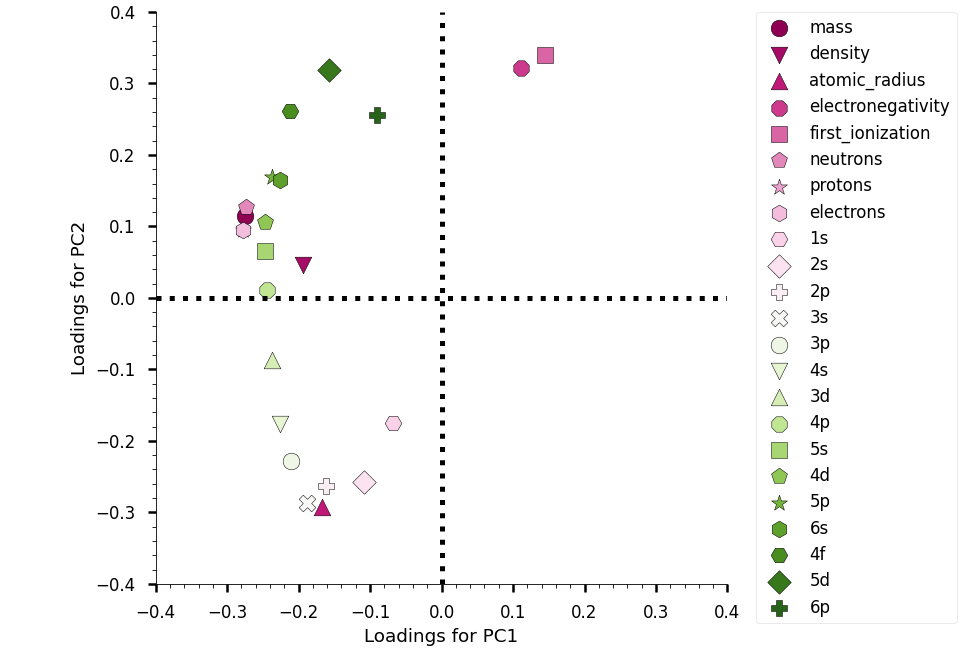

In [16]:
fig, ax = plt.subplots(constrained_layout=True)
for i, vari in enumerate(variables):
    ax.scatter(
        pc1[i], pc2[i],  # Loadings for variable no. i
        label=vari,
        marker=next(markers),
        s=100,
        color=colors[i],
        edgecolors='k'  # add color around symbols, to make them more visible
    )

3. Now, we do some styling of the plot, and we show a legend for the variables:

In [17]:
ax.set(xlabel='Loadings for PC1', ylabel='Loadings for PC2')
# Make the scale for the x- and y-axis the same:
ax.set_xlim(-0.4, 0.4)
ax.set_ylim(ax.get_xlim())
ax.set_aspect('equal')
# Add x=0 and y=0 lines to help location positive and negative values:
ax.axhline(y=0, ls=':', color='k')
ax.axvline(x=0, ls=':', color='k')
# Add a legend to show the variables:
ax.legend(ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Note here that we use `next(markers)` to access the next marker. If we
had just used `markers` we would run out of markers at some point!

After you have made the loadings plot, locate the
electronegativity and the atomic radius. Are these located (relative
to each other) as you would expect?

**Your answer to question 7.1(j):**

The atomic radius and the electronegativity are placed along a diagonal line in the plot. This is an example
of a negative correlation: when the atomic radius decreases, the electronegativity increases. 
This fits with our general chemistry knowledge: smaller atoms have higher electronegativity.

**(k)**  Finally, we will create the biplot. In this plot
we show the scores and loadings together. This is a bit more
challenging to make, and it can often look crowded. Here
is an example of how it can be created:

<IPython.core.display.Javascript object>


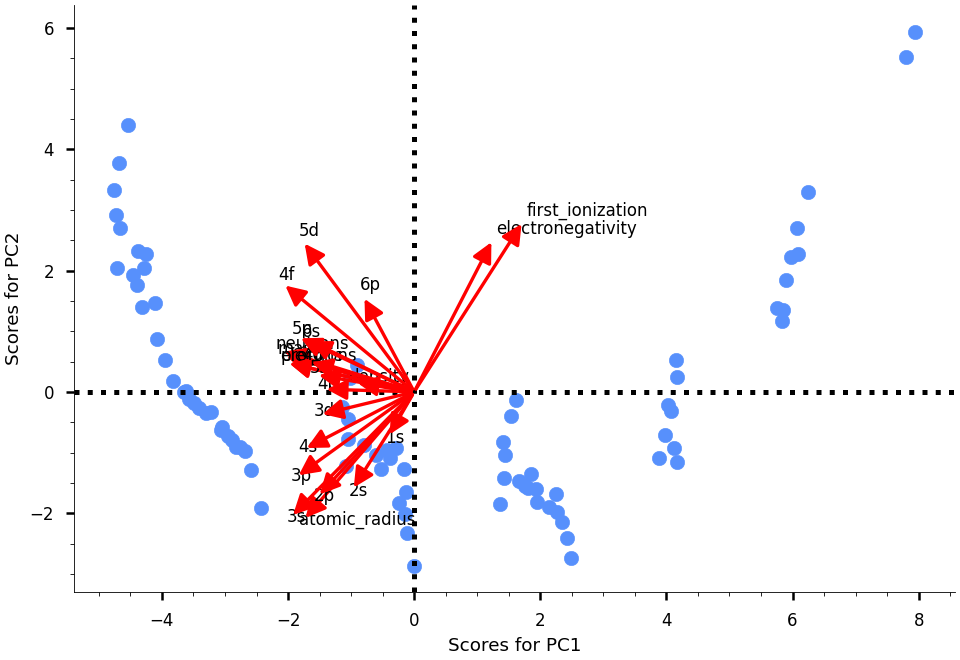

In [18]:
# Biplot:
markers = cycle(my_markers)
fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(scores[:, 0], scores[:, 1], s=75, label='Elements')
ax.set(xlabel='Scores for PC1', ylabel='Scores for PC2')
ax.axhline(y=0, ls=':', color='k')
ax.axvline(x=0, ls=':', color='k')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Get relative scale of the x- and y-axes:
scalex = (max(xlim) - min(xlim))
scaley = (max(ylim) - min(ylim))
scale_max = max(scalex, scaley)
scalex /= scale_max
scaley /= scale_max

# Figure out the "longest" loading:
lengths_max = max(pc1**2 + pc2**2)

# And figure out the largest circle we could put in
# the current axes:
radius = min([abs(i) for i in xlim + ylim])
# Scale things so that the "longest" loading will have
# a length equal to the radius we just found:
scale_factor = radius / lengths_max

for i, vari in enumerate(variables):
    # Scale lengths so that they are easier to see,
    # here it also works to just do:
    # x = pc1[i] * scalex * factor
    # y = pc2[i] * scaley * factor
    # for a suitable factor (just find one by trial and error).
    x = pc1[i] * scalex
    y = pc2[i] * scaley
    norm = np.sqrt(x**2 + y**2)
    x /= norm
    y /= norm
    length = pc1[i]**2 + pc2[i]**2
    x *= length * scale_factor
    y *= length * scale_factor

    # Add the scatter point, uncomment to draw the locations:
    #scat = ax.scatter(
    #    x, y,
    #    label=vari,
    #    marker=next(markers),
    #    s=100,
    #    color=colors[i],
    #    edgecolors='k',
    #)
    length = np.sqrt(x**2 + y**2)
    dx = x / length
    dy = y / length
    ax.text(x+0.1*dx, y+0.1*dy, vari)
    # Draw arrow from the origin to the point:
    ax.annotate(
        '',
        xy=(x, y),
        xytext=(0, 0),
        arrowprops=dict(arrowstyle='-|>', lw=2, color='red', mutation_scale=25),
    )
# Uncomment to add a legend:
#ax.legend(ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlim(xlim);
ax.set_ylim(ylim);

We could also scale the loadings by a larger factor to extend them to the borders of
the plot (you can try this on your own).

Create the biplot (run the code above, adding your own modifications (if any)) and
consider the following:

1. Does the direction of increasing mass correspond to what you would expect?

2. In this case, it is not so easy to interpret the biplot since we have many variables, and
   they seem to be almost equally important. But, if you were to give a simplified description of
   the two principal components, how would you describe them, and, does this fit with your
   understanding of the periodic system?

**Your answer to question 7.1(k):**

1. Yes, the mass is increasing towards the upwards, and to the left. This is consistent with the increasing size
   of the elements when moving to the left.
   
2. Let us give some overall interpretation of PC1 and PC2:

   * For PC1, it seems like the most dominating factor can be related to the size. The mass and atomic radius are
     both pointing towards the left. This is also consistent with the elements being "bigger"
     (in terms of the number
     of protons/electrons/neutrons and mass) to the left.
     
   * For PC2, there are also some size contributions and impact of properties like electronegativity. The
     interpretation of the electronic structure is more difficult, as there are some correlations here. If
     we have some electrons in a higher orbital, say 5s, then we know that 1s, 2s, 2p, ... and so on are
     filled. Also, if we have filled orbitals up to, say, 3s, then we know that all the higher
     ones are just zero (and thus do not contribute to the scores). In general, we see that lower orbitals
     point toward the negative PC2 direction, while higher orbitals point toward the positive PC2 direction.
     
     A simplified interpretation of the PC2 direction can then be that is reflects the distribution of electrons:
     within a group (a group in the plot!), elements further down have electrons in lower orbitals. If we
     check the elements, we have that the noble gasses ("full" electron configuration) are at the top (along PC2)
     in their respective groups.
     
   In general, it fits with the periodic system that reflects the electron configuration of the elements!